In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def read_stats_from_file(filename):
    stats = []

    with open(filename, "r") as f:
        for line in f:
            stats.append(float(line[:-1]))

    return stats

In [42]:
loss = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_w4_x_s1_loss_history-2.txt")
acc = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_w4_x_s1_acc_history-2.txt")

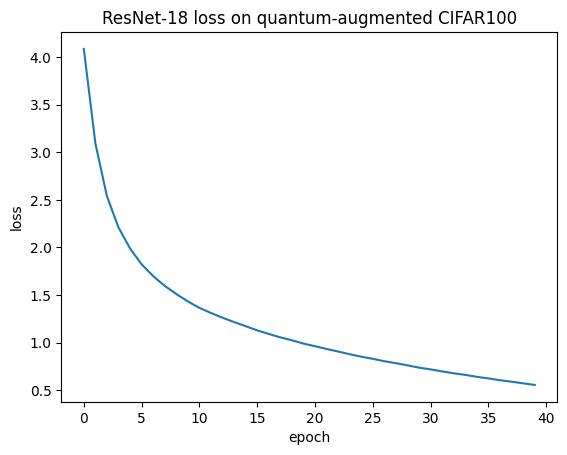

In [43]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('ResNet-18 loss on quantum-augmented CIFAR100')
plt.show()

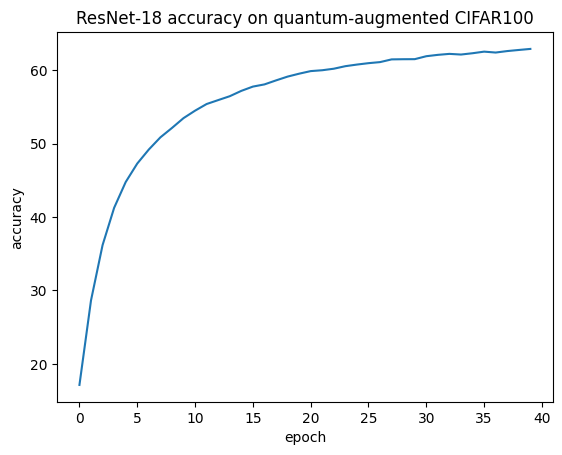

In [44]:
plt.plot(acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('ResNet-18 accuracy on quantum-augmented CIFAR100')
plt.show()

In [36]:
resnet_ref_loss = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_refrence_loss_history.txt")
resnet_ref_loss_2 = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_refrence_loss_history-2.txt")
resnet_ref_acc = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_refrence_acc_history.txt")
resnet_ref_acc_2 = read_stats_from_file("/mnt/c/phd/experiments/res/history/resnet_cifar_refrence_acc_history-2.txt")

In [37]:
for loss_item in resnet_ref_loss_2:
    resnet_ref_loss.append(loss_item)

for acc_item in resnet_ref_acc_2:
    resnet_ref_acc.append(acc_item)

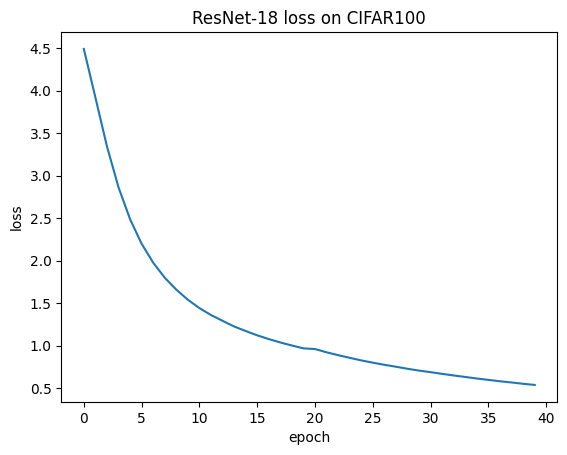

In [38]:
plt.plot(resnet_ref_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('ResNet-18 loss on CIFAR100')
plt.show()

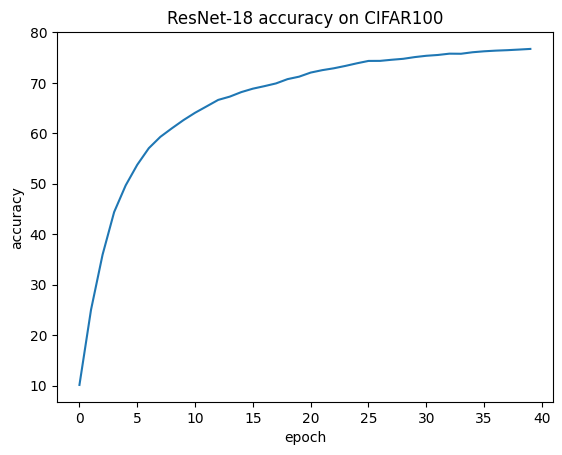

In [39]:
plt.plot(resnet_ref_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('ResNet-18 accuracy on CIFAR100')
plt.show()

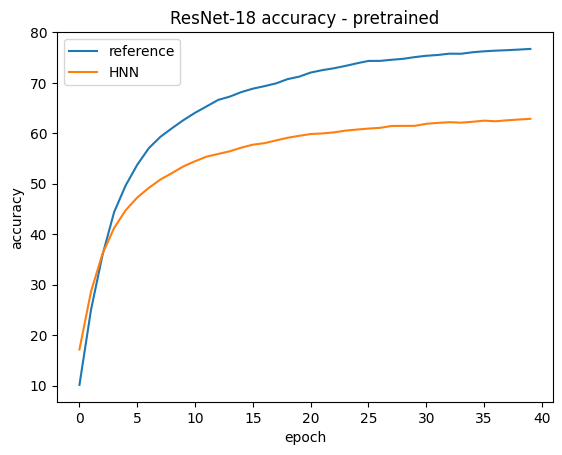

In [40]:
plt.plot(resnet_ref_acc, label = "reference")
plt.plot(acc, label = "HNN")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('ResNet-18 accuracy - pretrained')
plt.legend()
plt.show()

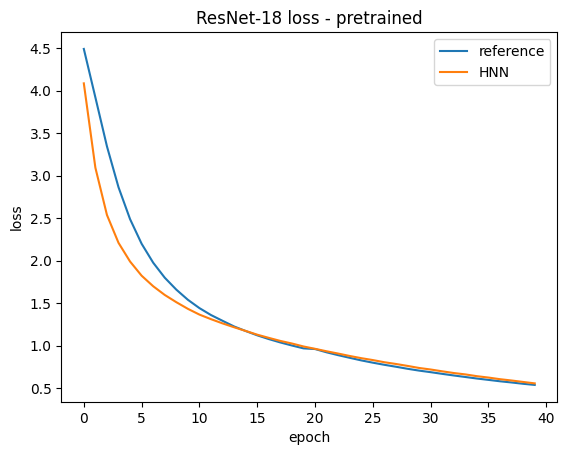

In [41]:
plt.plot(resnet_ref_loss, label = "reference")
plt.plot(loss, label = "HNN")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('ResNet-18 loss - pretrained')
plt.legend()
plt.show()

In [53]:
effnet_acc = [69.54, 70.35, 71.0, 71.31, 71.55, 72.47, 72.25]
effnet_ref_acc = [77.29000,81.67000,82.02000,82.83000,82.75000,83.11000,83.07000]

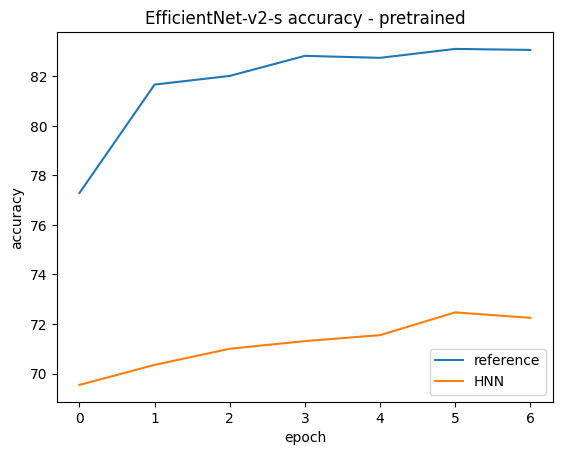

In [54]:
plt.plot(effnet_ref_acc, label = "reference")
plt.plot(effnet_acc, label = "HNN")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('EfficientNet-v2-s accuracy - pretrained')
plt.legend()
plt.show()

In [58]:
effnet_ref_loss = [1.96150,0.53334,0.29356,0.19372,0.14011,0.11287,0.09514]
effnet_loss = [1.07309,0.24079,0.11941,0.08261,0.06894,0.05668,0.05011]

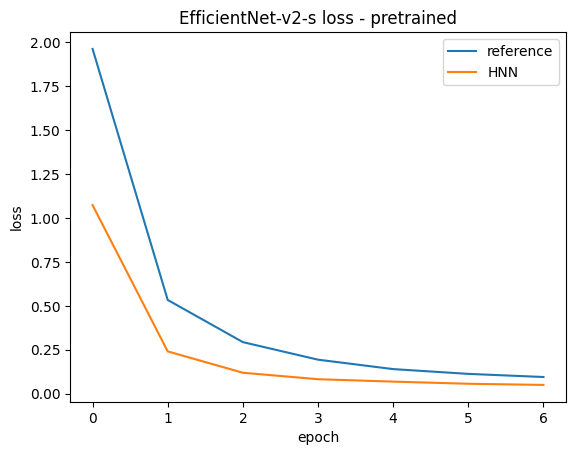

In [59]:
plt.plot(effnet_ref_loss, label = "reference")
plt.plot(effnet_loss, label = "HNN")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('EfficientNet-v2-s loss - pretrained')
plt.legend()
plt.show()

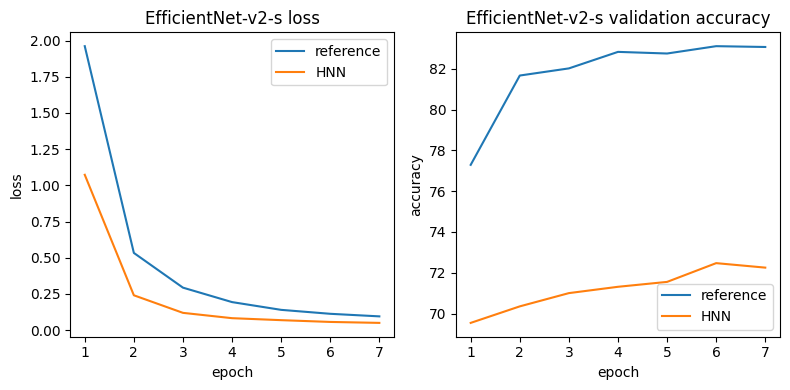

In [75]:
import numpy as np
import matplotlib.pyplot as plt

loss_indices = [x + 1 for x in range(len(effnet_ref_loss))]
acc_indices = [x + 1 for x in range(len(effnet_ref_acc))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(loss_indices, effnet_ref_loss, label="reference")
axes[0].plot(loss_indices, effnet_loss, label="HNN")
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_title('EfficientNet-v2-s loss')
axes[0].legend()

axes[1].plot(acc_indices, effnet_ref_acc, label="reference")
axes[1].plot(acc_indices, effnet_acc, label="HNN")
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('EfficientNet-v2-s validation accuracy')
axes[1].legend()

fig.tight_layout()

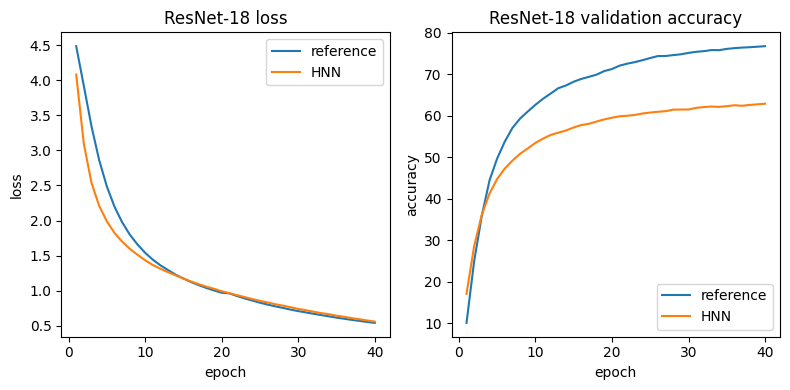

In [76]:
import numpy as np
import matplotlib.pyplot as plt

loss_indices = [x + 1 for x in range(len(resnet_ref_loss))]
acc_indices = [x + 1 for x in range(len(resnet_ref_acc))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(loss_indices, resnet_ref_loss, label="reference")
axes[0].plot(loss_indices, loss, label="HNN")
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_title('ResNet-18 loss')
axes[0].legend()

axes[1].plot(acc_indices, resnet_ref_acc, label="reference")
axes[1].plot(acc_indices, acc, label="HNN")
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('ResNet-18 validation accuracy')
axes[1].legend()

fig.tight_layout()

Files already downloaded and verified


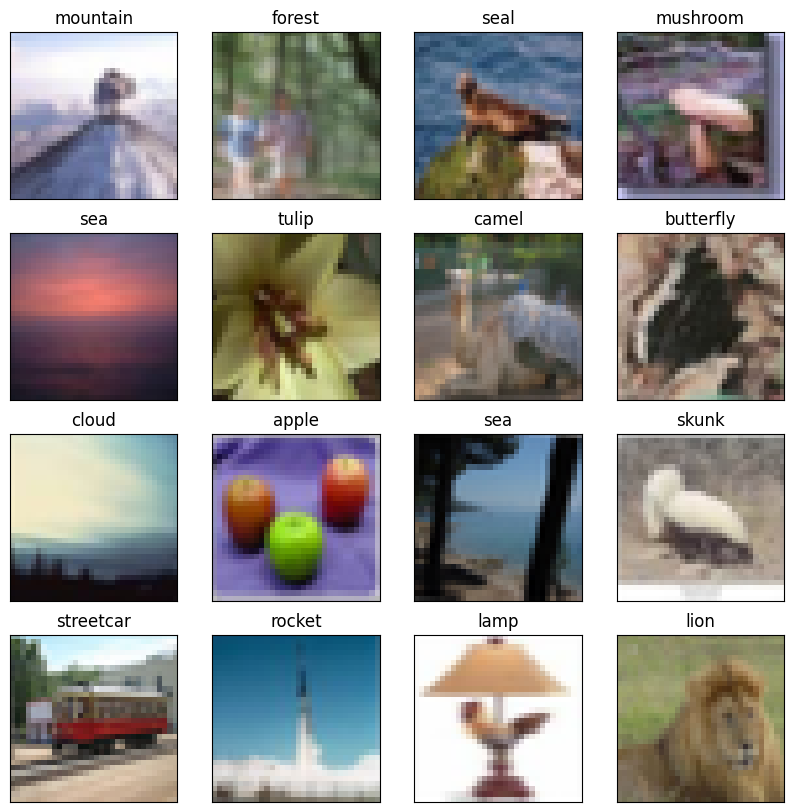

In [85]:
from matplotlib import pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

%matplotlib inline

test = torchvision.datasets.CIFAR100("./data-cifar100/", train=False, download=True, transform=transforms.ToTensor())

test_loader = DataLoader(test, batch_size=1, shuffle=False)

n_sample_shape = (4, 4)
count = 0
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for batch_idx, (data, target) in enumerate(test_loader):
    if count == n_sample_shape[0]*n_sample_shape[1]:
        break

    # axes[0].set_ylabel("Classic")
    axes[int(count / n_sample_shape[0])][count % n_sample_shape[1]].imshow(data[0].permute(1, 2, 0))
    axes[int(count / n_sample_shape[0])][count % n_sample_shape[1]].set_xticks([])
    axes[int(count / n_sample_shape[0])][count % n_sample_shape[1]].set_yticks([])
    axes[int(count / n_sample_shape[0])][count % n_sample_shape[1]].set_title(test.classes[target.item()])

    count += 1


In [86]:
hd_dataset = torchvision.datasets.ImageFolder("/mnt/c/phd/data-preparation/raw_hurricane_dataset/train_another/", transform=transforms.ToTensor())
hd_dataloader = DataLoader(hd_dataset, batch_size=4)

In [104]:
from torch.utils.data import DataLoader, TensorDataset
import torch

q_hd_dataset = TensorDataset(torch.Tensor(np.load("/mnt/d/PHD/hurricane_data_results/W4_X_s2/QNN_TRAIN_CPU_hurricane_W4_X_S0_E1000_s2.npy")))
q_hd_dataloader = DataLoader(q_hd_dataset, batch_size=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])
torch.Size([64, 64, 3, 4])


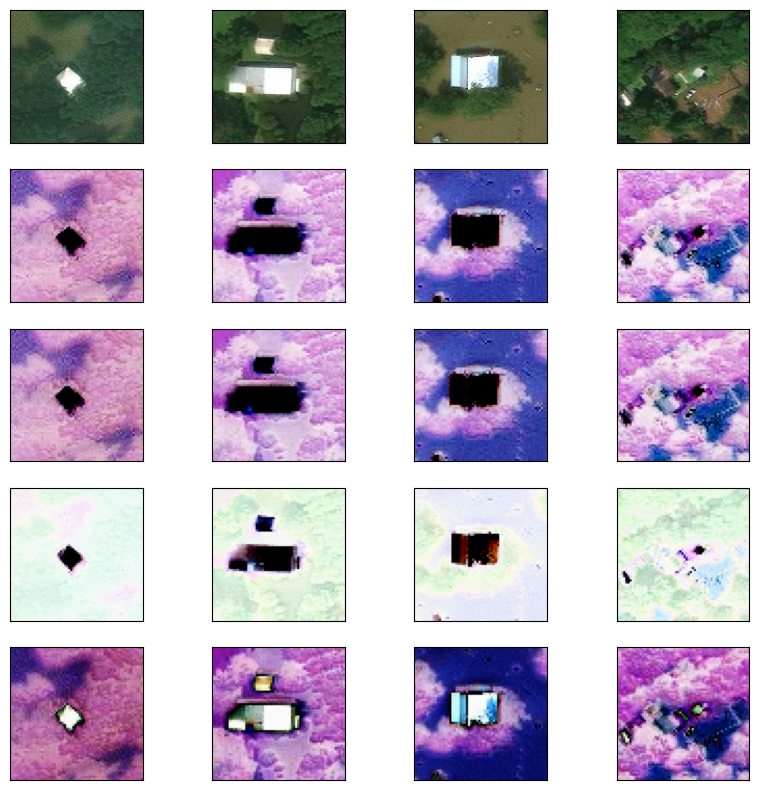

In [105]:
n_sample_shape = (5, 4)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))
count = 0

imgs, _ = next(iter(hd_dataloader))
for i, img in enumerate(imgs):
    axes[0][i].imshow(img.permute(1, 2, 0))
    axes[0][i].set_xticks([])
    axes[0][i].set_yticks([])

count = 0

imgs = next(iter(q_hd_dataloader))

for i, img in enumerate(imgs[0]):
    for j in range(4):
        print(img.shape)
        axes[j + 1][i].imshow(img.permute(3, 0, 1, 2)[j])
        axes[j + 1][i].set_xticks([])
        axes[j + 1][i].set_yticks([])



In [6]:
resnet_loss_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/resnet_hurricane_W4_x_s2_loss_history_val2.txt")
resnet_acc_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/resnet_hurricane_W4_x_s2_acc_history_val2.txt")
resnet_ref_loss_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/resnet_hurricane_refrence_loss_history.txt")
resnet_ref_acc_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/resnet_hurricane_refrence_acc_history.txt")

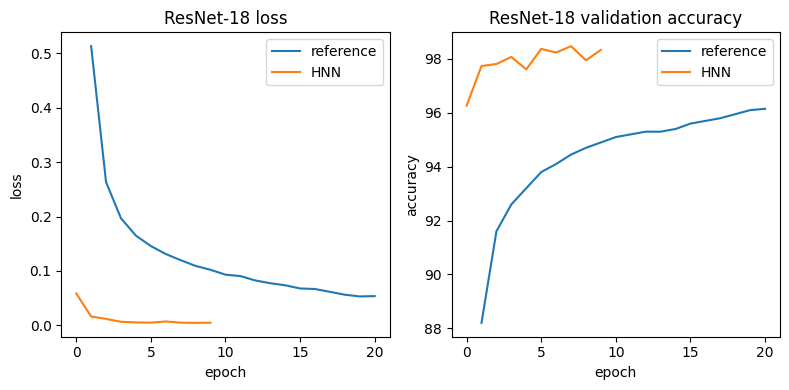

In [8]:
import numpy as np
import matplotlib.pyplot as plt

loss_indices = [x + 1 for x in range(len(resnet_ref_loss_hd))]
acc_indices = [x + 1 for x in range(len(resnet_ref_acc_hd))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(loss_indices, resnet_ref_loss_hd, label="reference")
axes[0].plot(resnet_loss_hd, label="HNN")
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_title('ResNet-18 loss')
axes[0].legend()

axes[1].plot(acc_indices, resnet_ref_acc_hd, label="reference")
axes[1].plot(resnet_acc_hd, label="HNN")
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('ResNet-18 validation accuracy')
axes[1].legend()

fig.tight_layout()

In [113]:
effnet_loss_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/effnet_hurricane_W4_x_s2_loss_history_val2.txt")
effnet_acc_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/effnet_hurricane_W4_x_s2_acc_history_val2.txt")
effnet_ref_loss_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/effnet_hurricane_refrence_loss_history.txt")
effnet_ref_acc_hd = read_stats_from_file("/mnt/c/Users/Yevhenii/Downloads/history-20240218T003747Z-001/history/effnet_hurricane_refrence_acc_history.txt")

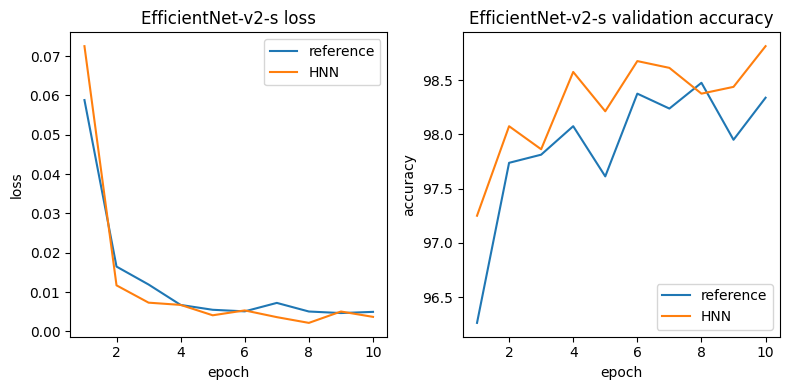

In [114]:
import numpy as np
import matplotlib.pyplot as plt

loss_indices = [x + 1 for x in range(len(effnet_ref_loss_hd))]
acc_indices = [x + 1 for x in range(len(effnet_ref_acc_hd))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(loss_indices, resnet_ref_loss_hd, label="reference")
axes[0].plot(loss_indices, effnet_loss_hd, label="HNN")
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_title('EfficientNet-v2-s loss')
axes[0].legend()

axes[1].plot(acc_indices, resnet_ref_acc_hd, label="reference")
axes[1].plot(acc_indices, effnet_acc_hd, label="HNN")
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_title('EfficientNet-v2-s validation accuracy')
axes[1].legend()

fig.tight_layout()